### 感知机实现逻辑电路

In [1]:
#与门
def YuMen(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [5]:
YuMen(1,0)

0

In [6]:
import numpy as np

In [7]:
#与门变形
def YuMen(x1, x2):
    input_x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    temp = np.sum(input_x * w) + b
    if temp <= 0:
        return 0
    else:
        return 1

In [13]:
YuMen(1,1)

1

In [21]:
#与非门
def YuFeiMen(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5]) # 仅权重和偏置与AND不同！
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [22]:
YuFeiMen(1,1)

0

In [23]:
#或门
def HuoMen(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5]) # 仅权重和偏置与AND不同！
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [25]:
HuoMen(0,0)

0

### 多层感知机

In [26]:
def YiHuoMen(x1,x2):
    s1 = YuFeiMen(x1,x2)
    s2 = HuoMen(x1,x2)
    y = YuMen(s1,s2)
    return y

In [30]:
YiHuoMen(0,1)

1

### 神经网络

#### 激活函数

In [31]:
#sigmoid函数
def sigmoid(x):
    h = 1/(1+np.exp(-x))
    return h

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

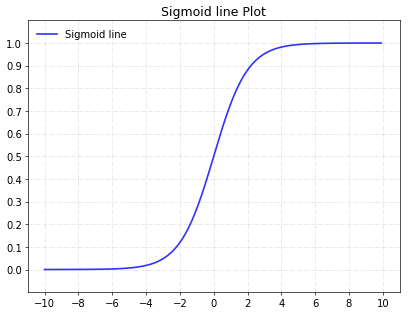

In [36]:
#绘制sigmoid曲线
# 绘制 sigmoid函数曲线
x = np.arange(-10,10,0.1)
y = sigmoid(x)

plt.figure(figsize = (8,6),dpi=60)
plt.plot(x,y,c='blue',alpha=0.8,linewidth=2,label='Sigmoid line')
plt.ylim(-0.1,1.1)
plt.xlim(-11,11)
plt.yticks(np.arange(0,1.1,0.1),fontsize=12)
plt.xticks(np.arange(-10,11,2),fontsize=12)
plt.title('Sigmoid line Plot',color='k',fontsize=15)
plt.grid(linestyle='-.',alpha=0.4)
plt.legend(loc=2
           ,frameon=False
           ,fontsize=12)
plt.show()

In [37]:
# 使用numpy实现阶跃函数
def step_function(x):
    y = x > 0 #生成布尔序列
    return y.astype(np.int) #把布尔序列转换成1和 0

In [38]:
x = np.array([-1,1,2])
step_function(x)

array([0, 1, 1])

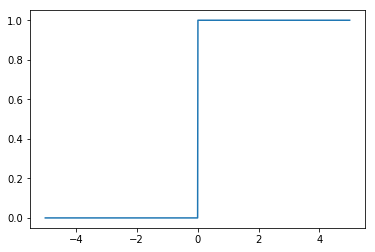

In [39]:
# 绘制阶跃函数图形
x = np.arange(-5,5,0.01)
y = step_function(x)
plt.plot(x,y);

In [41]:
#Relu函数
def relu(x):
    y = np.maximum(0,x) #从输入的数值中选择较大的那个值输出
    return y

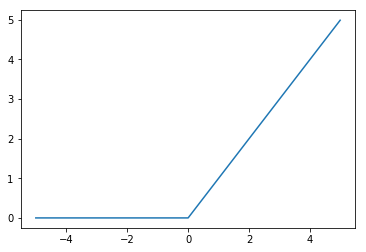

In [42]:
# 绘制 relu函数
x = np.arange(-5,5,0.01)
y = np.maximum(0,x)
plt.plot(x,y);

### 2层神经网络的实现

In [43]:
# 矩阵形式
X = np.array([2,4])

In [44]:
X.shape

(2,)

In [45]:
W = np.array([[1,3,5],[2,4,6]])

In [46]:
W.shape

(2, 3)

In [47]:
Y = np.dot(X,W)
Y

array([10, 22, 34])

In [48]:
Y.shape

(3,)

### 3层神经网络的实现

In [49]:
X = np.array([1.0,0.5])

In [50]:
X.shape

(2,)

In [51]:
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])

In [52]:
W1

array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]])

In [53]:
B1 = np.array([0.1,0.2,0.3])

In [54]:
print(W1.shape) # (2，3)
print(X.shape) # (2,)
print(B1.shape) # (3,)

(2, 3)
(2,)
(3,)


In [55]:
A1 = np.dot(X,W1) + B1
A1 # array([0.3, 0.7, 1.1])

array([0.3, 0.7, 1.1])

In [56]:
#对第一层输出信号a进行转换
Z1 = sigmoid(A1)

In [58]:
Z1 #传向下一层的数据

array([0.57444252, 0.66818777, 0.75026011])

In [59]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2

In [60]:
A2

array([0.51615984, 1.21402696])

In [62]:
Z2 = sigmoid(A2) #传向输出层的实际值
Z2

array([0.62624937, 0.7710107 ])

In [63]:
# 定义恒等函数
def identity_function(x):
    return x

In [64]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # 相当于 Y = A3
print(Y) # [0.31682708, 0.69627909]

[0.31682708 0.69627909]


In [71]:
#三层神经网络的代码
def init_network():
    network = {
    "W1":np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]),
    'b1':np.array([0.1,0.2,0.3]),
    'W2':np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]),
    'b2':np.array([0.1,0.2]),
    'W3':np.array([[0.1,0.3],[0.2,0.4]]),
    'b3':np.array([0.1,0.2])
    }
    return network

In [72]:
def forward(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+ b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
    return y

In [75]:
network = init_network()
x = np.array([1.0, 0.5]) # 待训练样本
y = forward(network, x) # 训练结果
print(y) 

[0.31682708 0.69627909]


### 输出层的设计

In [76]:
# softmax函数
def softmax(a):
    exp_a = np.exp(a) #指数函数
    sum_exp_a = exp_a.sum()
    y = exp_a / sum_exp_a
    return y

In [77]:
#测试函数运行结果
a = np.array([0.3,2.9,4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [78]:
np.exp(100)

2.6881171418161356e+43

In [79]:
np.exp(1000)

inf

In [80]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) #返回 array([nan, nan, nan])，没有被正确计算

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [81]:
c = np.max(a)
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [82]:
#改进后的softmax
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 防止溢出
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [83]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [84]:
np.sum(y)

1.0

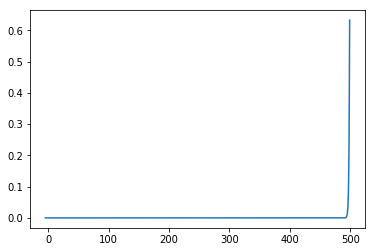

In [87]:
X = np.arange(-5,500,1)
y = softmax(X)
plt.plot(X,y);

### 神经网络分类器

In [89]:
import numpy as np
from sklearn.neural_network import MLPClassifier as DNN
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score as cv
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from time import time
import datetime

In [90]:
#获取数据
data = load_breast_cancer()
X = data.data
y = data.target

In [91]:
#切分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [92]:
Xtrain.shape

(398, 30)

In [93]:
Xtest.shape

(171, 30)

In [95]:
#神经网络分类器建模
times = time()
dnn = DNN(hidden_layer_sizes=(100,),max_iter=500,random_state=420)
print(cv(dnn,X,y,cv=5).mean())  #5折交叉验证
print(time() - times)

0.9296344747979992
4.9462831020355225


In [96]:
#决策树建模
times = time()
clf = DTC(random_state=420)
print(cv(clf,X,y,cv=5).mean())
print(time() - times)

0.9173989996152366
0.19901132583618164


In [98]:
dnn = DNN(hidden_layer_sizes=(100,),max_iter=500,random_state=420).fit(Xtrain,Ytrain)
dnn.score(Xtest,Ytest)

0.9239766081871345

In [99]:
dnn.n_layers_ #查看神经网络层数（包含输入层和输出层）

3

In [100]:
#如果增加一个隐藏层上的神经元个数，会发生什么呢？
dnn = DNN(hidden_layer_sizes=(200,),max_iter=500,random_state=420)
dnn = dnn.fit(Xtrain,Ytrain)
dnn.score(Xtest,Ytest)

0.9181286549707602

1900 0.9298245614035088


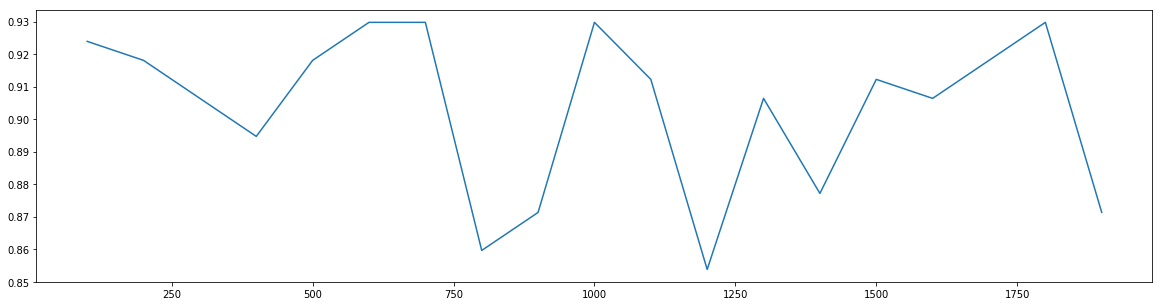

In [101]:
#绘制隐藏层神经元个数学习曲线

s = []
for i in range(100,2000,100):
    dnn = DNN(hidden_layer_sizes=(int(i),),max_iter=500,random_state=420).fit(Xtrain,Ytrain)
    s.append(dnn.score(Xtest,Ytest))
print(i,max(s))
plt.figure(figsize=(20,5))
plt.plot(range(100,2000,100),s)
plt.show()

(100, 100, 100, 100, 100, 100) 0.9239766081871345


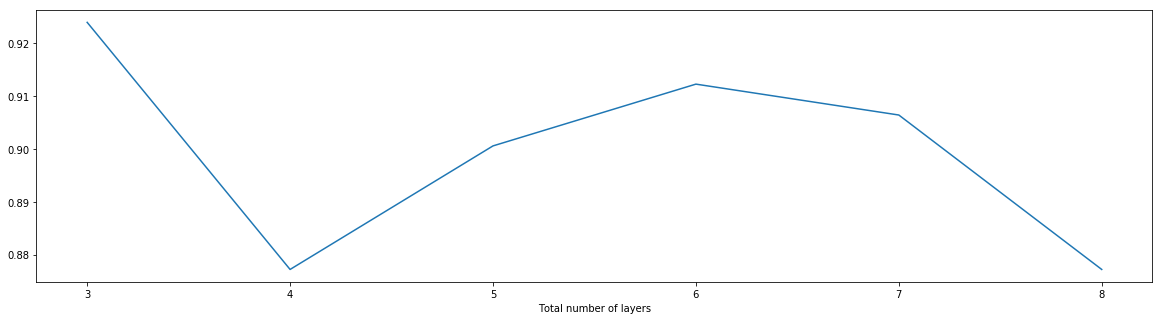

In [103]:
#那如果增加隐藏层，控制神经元个数，会发生什么呢？
s = []
layers = [(100,),(100,100),(100,100,100),(100,100,100,100),
          (100,100,100,100,100),(100,100,100,100,100,100)]
for i in layers:
    dnn = DNN(hidden_layer_sizes=(i),max_iter=500,random_state=420).fit(Xtrain,Ytrain)
    s.append(dnn.score(Xtest,Ytest))
print(i,max(s))
plt.figure(figsize=(20,5))
plt.plot(range(3,9),s)
plt.xticks([3,4,5,6,7,8])
plt.xlabel("Total number of layers")
plt.show()

(300, 300, 300, 300) 0.9239766081871345


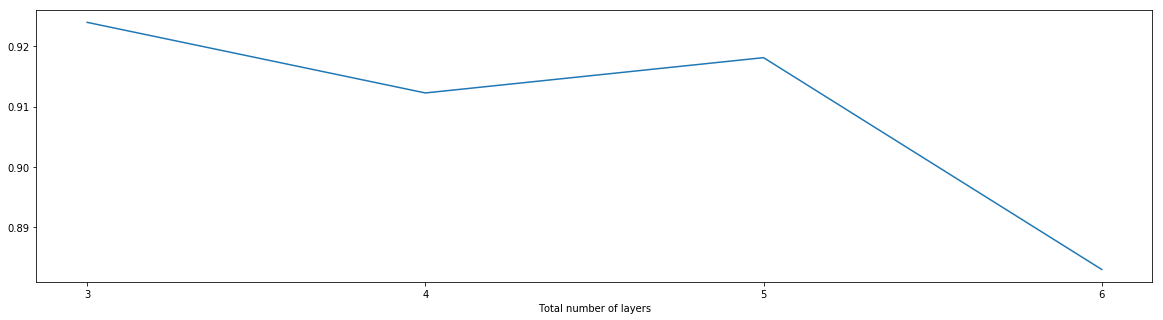

In [105]:
#如果同时增加隐藏层和神经元个数，会发生什么呢？
s = []
layers = [(100,),(150,150),(200,200,200),(300,300,300,300)]
for i in layers:
    dnn = DNN(hidden_layer_sizes=(i),max_iter=500,random_state=420).fit(Xtrain,Ytrain)
    s.append(dnn.score(Xtest,Ytest))
print(i,max(s))
plt.figure(figsize=(20,5))
plt.plot(range(3,7),s)
plt.xticks([3,4,5,6])
plt.xlabel("Total number of layers")
plt.show()